# PROBLEM STATEMENT

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 
Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [126]:
# importing necessary libraries

import pandas as pd, numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [127]:
# suppress warnings

import warnings
warnings.filterwarnings("ignore")

In [128]:
# Read the dataset

lead_df=pd.read_csv('Leads.csv')
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [129]:
# Check the shape

lead_df.shape

(9240, 37)

### OBSERVATIONS
* There are 9240 rows and 37 columns

In [130]:
# Checking the info to see the types of the feature variables and the null values present

lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [131]:
# Summary statistics of the dataset

lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## DATA PREPROCESSING

In [132]:
 # Checking null value percentage

(lead_df.isnull().mean()*100).sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

### OBSERVATIONS
* There are a few columns with a high percentage of null values, so we will get rid of those

In [133]:
# Columns having a high null value percentage

(lead_df.isnull().mean()*100).sort_values(ascending=False)[lead_df.isnull().mean()*100>30]

Lead Quality                   51.590909
Asymmetrique Activity Index    45.649351
Asymmetrique Profile Score     45.649351
Asymmetrique Activity Score    45.649351
Asymmetrique Profile Index     45.649351
Tags                           36.287879
dtype: float64

In [134]:
for col in lead_df.columns:
    if lead_df[col].isnull().mean()*100>30:
        del lead_df[col]

In [135]:
lead_df.shape

(9240, 31)

In [136]:
# Checking null value perccentage again

(lead_df.isnull().mean()*100).sort_values(ascending=False)

What matters most to you in choosing a course    29.318182
Lead Profile                                     29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Get updates on DM Content                         0.000000
Newspaper                                         0.000000
I agree to pay the amount through cheque          0.000000
A free copy of Mastering The Interview            0.000000
Update me on Supply Chain Content                 0.000000
Receive More Updates About Our Courses            0.0000

In [137]:
# Dropping Country and City since they are not of any use in the analysis

lead_df.drop(['Country','City'],axis=1,inplace=True)

In [138]:
# Now let's check all the columns features
for i in lead_df:
    print(lead_df[i].astype('category').value_counts())
    print('-------------------------')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
-------------------------
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
-------------------------
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
-------------------------
Lead Source
Google        

### OBSERVATIONS
* Columns like Lead Profile and How did you hear about X Education have a high number of 'Select' values which represents a null value so we are going to drop these
* In columns like Do Not Call,Search,Magazine,Newspaper Article,X Education Forums,Newspaper, Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content, I agree to pay the amount through cheque,What matters most to you in choosing a course only one value is majorly present for the data points. So we are not going to use them in our analysis

In [139]:
lead_df.drop(['Lead Profile', 'How did you hear about X Education'],axis=1,inplace=True)

In [140]:
lead_df.drop(['Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper', 
            'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content','Get updates on DM Content', 
            'I agree to pay the amount through cheque','What matters most to you in choosing a course'], axis = 1, inplace = True)

In [141]:
# Check null value percentage

(lead_df.isnull().mean()*100).sort_values(ascending=False)

What is your current occupation           29.112554
Specialization                            15.562771
TotalVisits                                1.482684
Page Views Per Visit                       1.482684
Last Activity                              1.114719
Lead Source                                0.389610
Prospect ID                                0.000000
Lead Number                                0.000000
Lead Origin                                0.000000
Do Not Email                               0.000000
Converted                                  0.000000
Total Time Spent on Website                0.000000
A free copy of Mastering The Interview     0.000000
Last Notable Activity                      0.000000
dtype: float64

In [142]:
# Removing missing values in lead source

lead_df = lead_df[~pd.isnull(lead_df['Lead Source'])]

In [143]:
# Dropping the missing rows in What is your current occupation and Specializatio    

lead_df=lead_df[~pd.isnull(lead_df['What is your current occupation'])]
lead_df=lead_df[~pd.isnull(lead_df['Specialization'])]

In [144]:
# Rechecking null value percentage

(lead_df.isnull().mean()*100).sort_values(ascending=False)

TotalVisits                               1.893473
Page Views Per Visit                      1.893473
Last Activity                             1.554803
Prospect ID                               0.000000
Lead Number                               0.000000
Lead Origin                               0.000000
Lead Source                               0.000000
Do Not Email                              0.000000
Converted                                 0.000000
Total Time Spent on Website               0.000000
Specialization                            0.000000
What is your current occupation           0.000000
A free copy of Mastering The Interview    0.000000
Last Notable Activity                     0.000000
dtype: float64

In [145]:
# Removing the missing information rows in the following

cols=['TotalVisits','Page Views Per Visit','Last Activity']
for i in lead_df.columns:
    lead_df=lead_df[~pd.isnull(lead_df[i])]

In [146]:
# Rechecking null value percentage

(lead_df.isnull().mean()*100).sort_values(ascending=False)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
Last Notable Activity                     0.0
dtype: float64

In [147]:
# Let's now look at Lead Source

lead_df['Lead Source'].value_counts()

Lead Source
Google               2048
Direct Traffic       1873
Olark Chat            892
Organic Search        870
Reference             443
Welingak Website      129
Referral Sites         75
Facebook               28
Click2call              4
bing                    3
Social Media            2
Live Chat               2
Pay per Click Ads       1
WeLearn                 1
testone                 1
Press_Release           1
Name: count, dtype: int64

In [148]:
# Clubbing all the lesser represented values as 'Others'

lead_df['Lead Source']= lead_df['Lead Source'].replace(['Click2call','bing','Social Media','Live Chat','Pay per Click Ads','WeLearn',
                                'testone','Press_Release'],'Others')
lead_df['Lead Source'].value_counts()

Lead Source
Google              2048
Direct Traffic      1873
Olark Chat           892
Organic Search       870
Reference            443
Welingak Website     129
Referral Sites        75
Facebook              28
Others                15
Name: count, dtype: int64

In [149]:
# Let's now look at Last Activity

lead_df['Last Activity'].value_counts()

Last Activity
Email Opened                    2455
SMS Sent                        2189
Olark Chat Conversation          428
Page Visited on Website          427
Converted to Lead                292
Email Link Clicked               178
Email Bounced                    175
Form Submitted on Website         81
Unreachable                       71
Unsubscribed                      40
Had a Phone Conversation          23
Approached upfront                 5
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Name: count, dtype: int64

In [150]:
# Clubbing all the lesser represented values as 'Others'

lead_df['Last Activity']=lead_df['Last Activity'].replace(['Approached upfront','View in browser link Clicked',
                                                           'Email Received','Email Marked Spam',
                                                           'Visited Booth in Tradeshow'],'Others')
lead_df['Last Activity'].value_counts()

Last Activity
Email Opened                 2455
SMS Sent                     2189
Olark Chat Conversation       428
Page Visited on Website       427
Converted to Lead             292
Email Link Clicked            178
Email Bounced                 175
Form Submitted on Website      81
Unreachable                    71
Unsubscribed                   40
Had a Phone Conversation       23
Others                         14
Name: count, dtype: int64

In [151]:
# Let's look at Specialization

lead_df.Specialization.value_counts()

Specialization
Select                               1838
Finance Management                    745
Human Resource Management             665
Marketing Management                  663
Operations Management                 391
Business Administration               310
IT Projects Management                278
Supply Chain Management               275
Banking, Investment And Insurance     266
Media and Advertising                 161
Travel and Tourism                    149
International Business                136
Healthcare Management                 122
Hospitality Management                 90
E-COMMERCE                             80
Retail Management                      78
Rural and Agribusiness                 58
E-Business                             43
Services Excellence                    25
Name: count, dtype: int64

### OBSERVATIONS
* A lot of values are 'Select' which implies null values as the person filling the form has left it empty on purpose
* We will make another category out of it

In [152]:
lead_df.Specialization=lead_df.Specialization.replace('Select','Not Available')

In [153]:
lead_df.Specialization.value_counts()

Specialization
Not Available                        1838
Finance Management                    745
Human Resource Management             665
Marketing Management                  663
Operations Management                 391
Business Administration               310
IT Projects Management                278
Supply Chain Management               275
Banking, Investment And Insurance     266
Media and Advertising                 161
Travel and Tourism                    149
International Business                136
Healthcare Management                 122
Hospitality Management                 90
E-COMMERCE                             80
Retail Management                      78
Rural and Agribusiness                 58
E-Business                             43
Services Excellence                    25
Name: count, dtype: int64

## Visualizing the Data

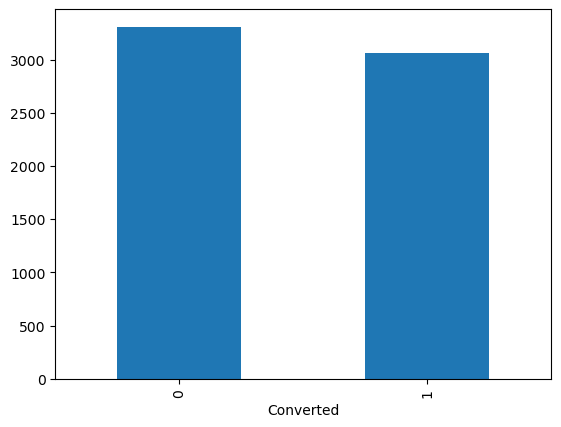

In [154]:
# Let's check the target variable

lead_df['Converted'].value_counts().plot.bar()
plt.show()

In [155]:
imbalance_ratio=len(lead_df[lead_df['Converted']==0])/len(lead_df[lead_df['Converted']==1])
print('Imbalance Ratio is' ,round(imbalance_ratio,2))

Imbalance Ratio is 1.08


### OBSERVATIONS
* There is no Imbalance in the target column

<Figure size 1500x500 with 0 Axes>

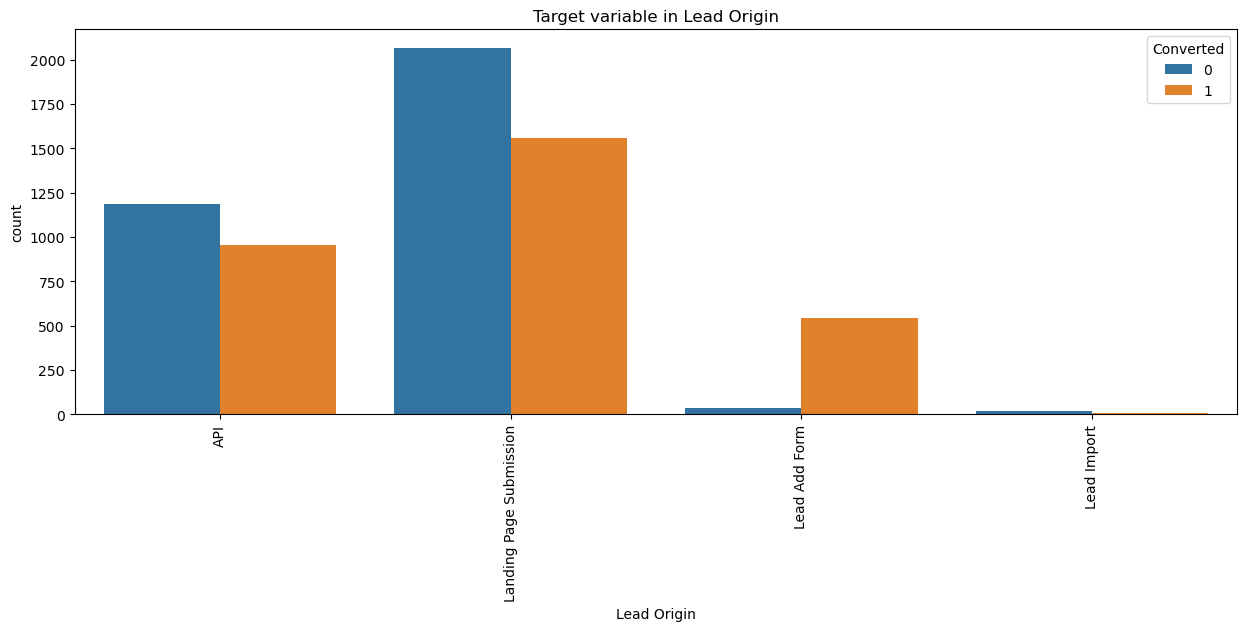

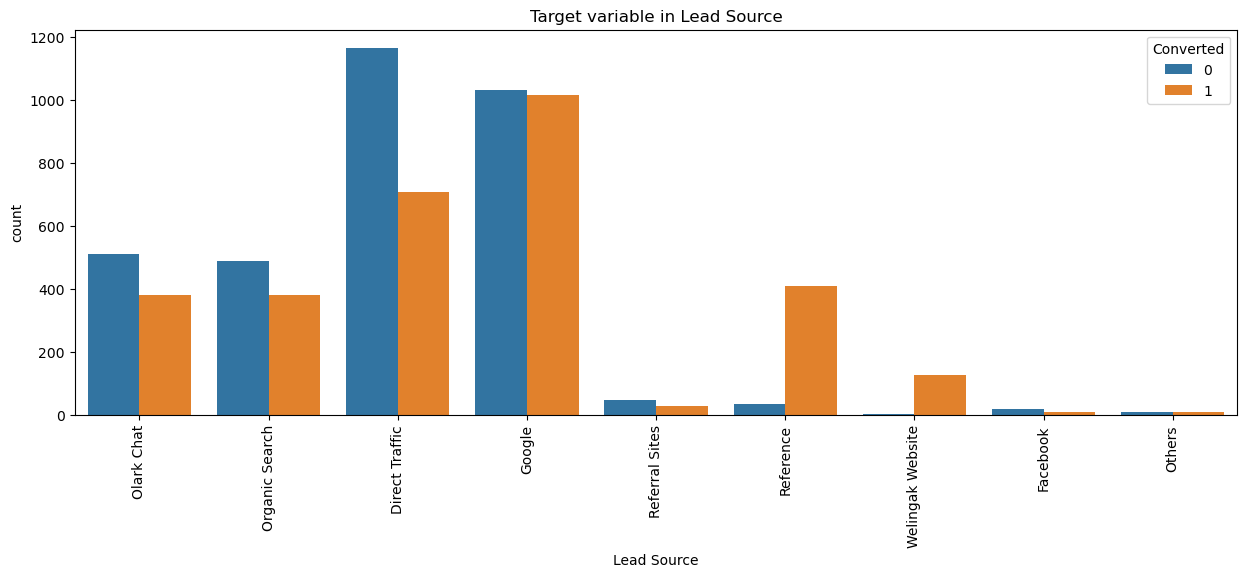

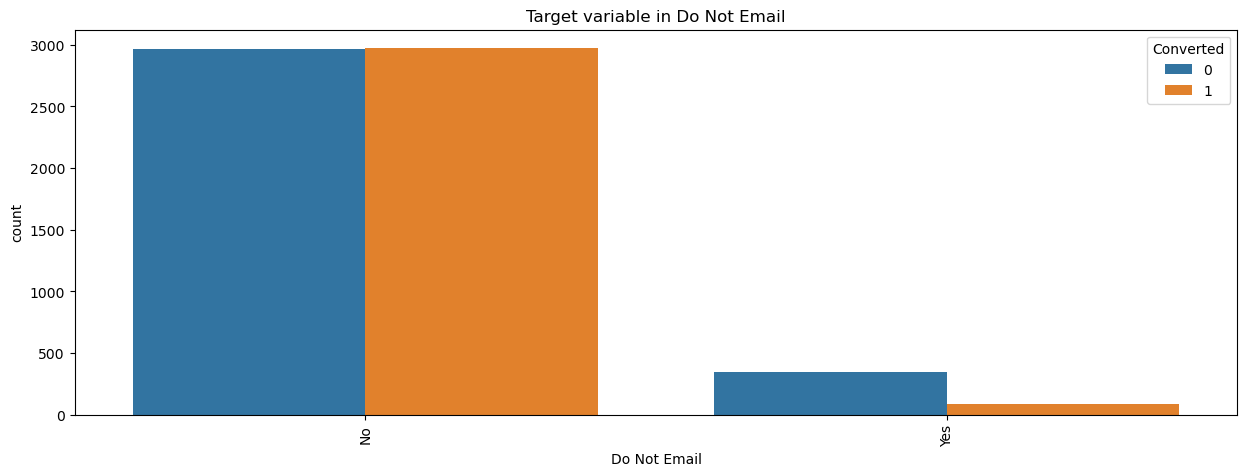

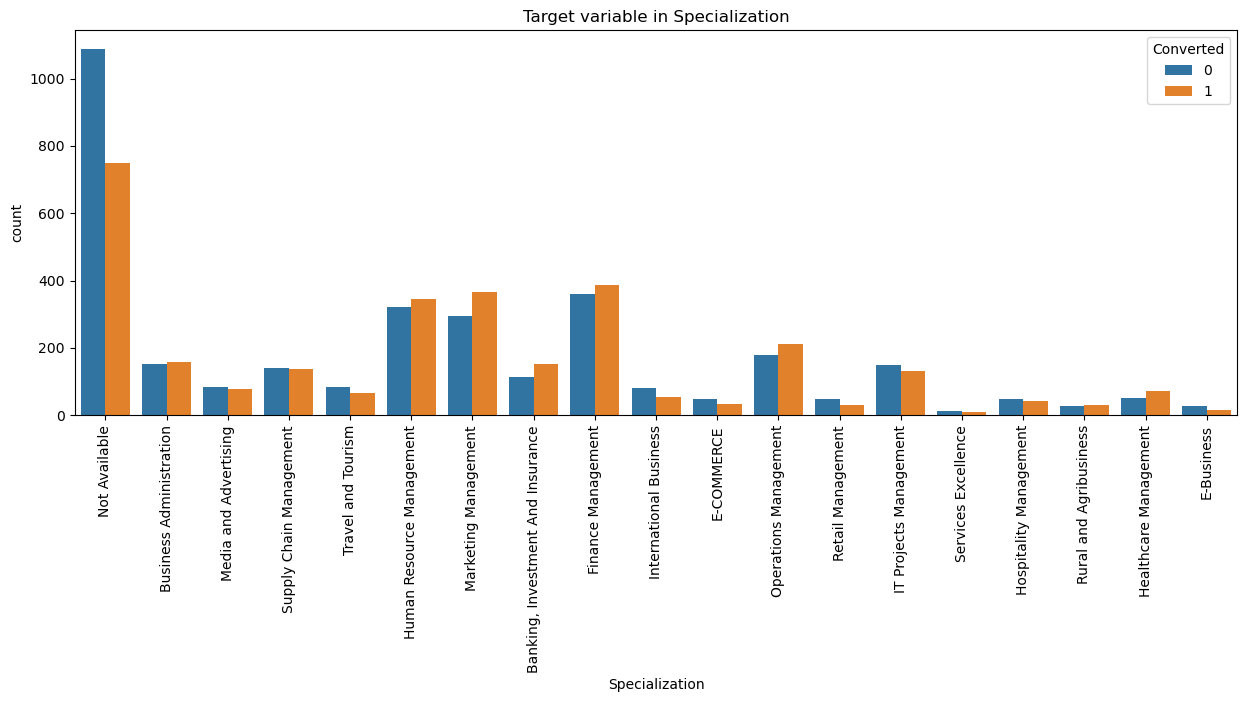

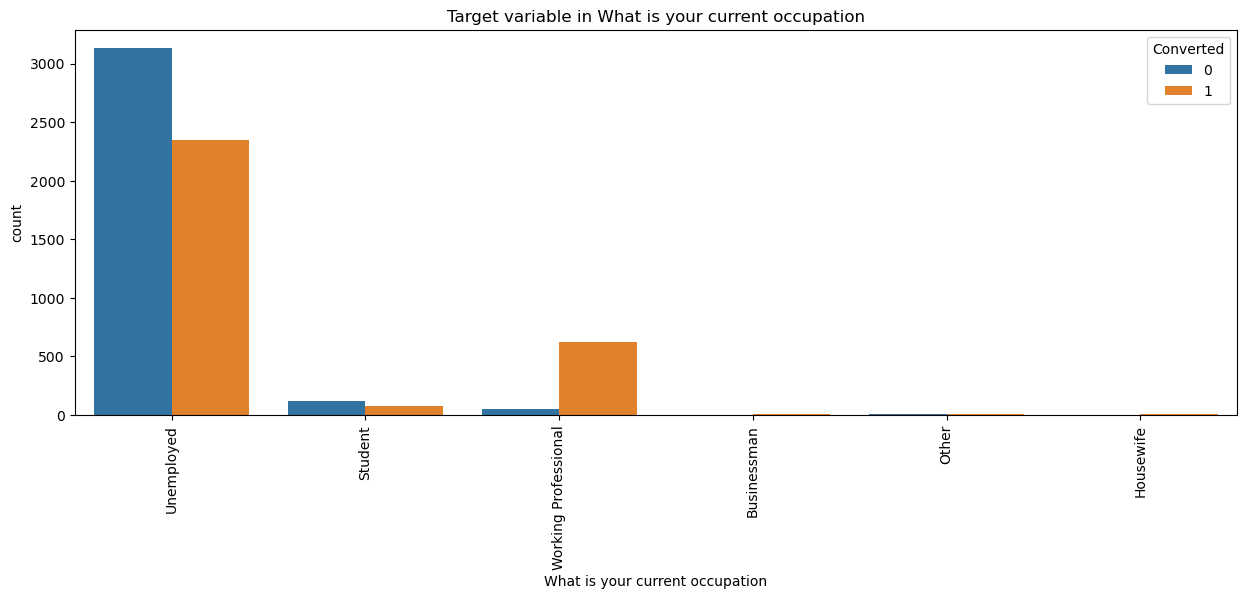

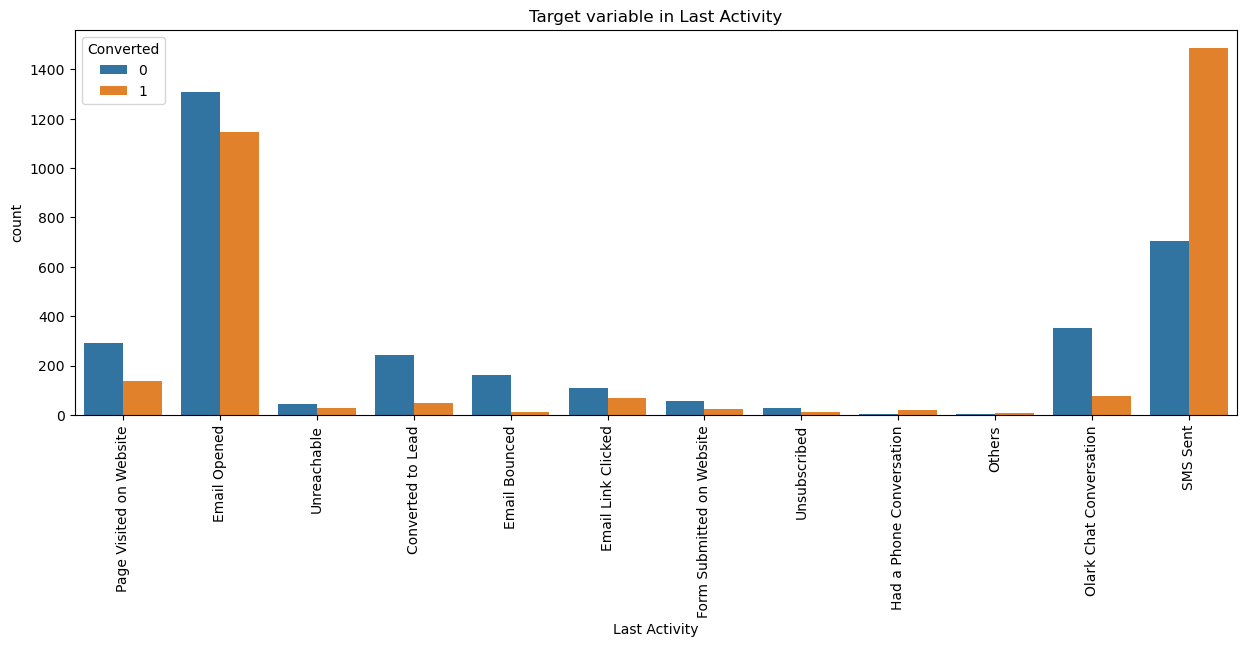

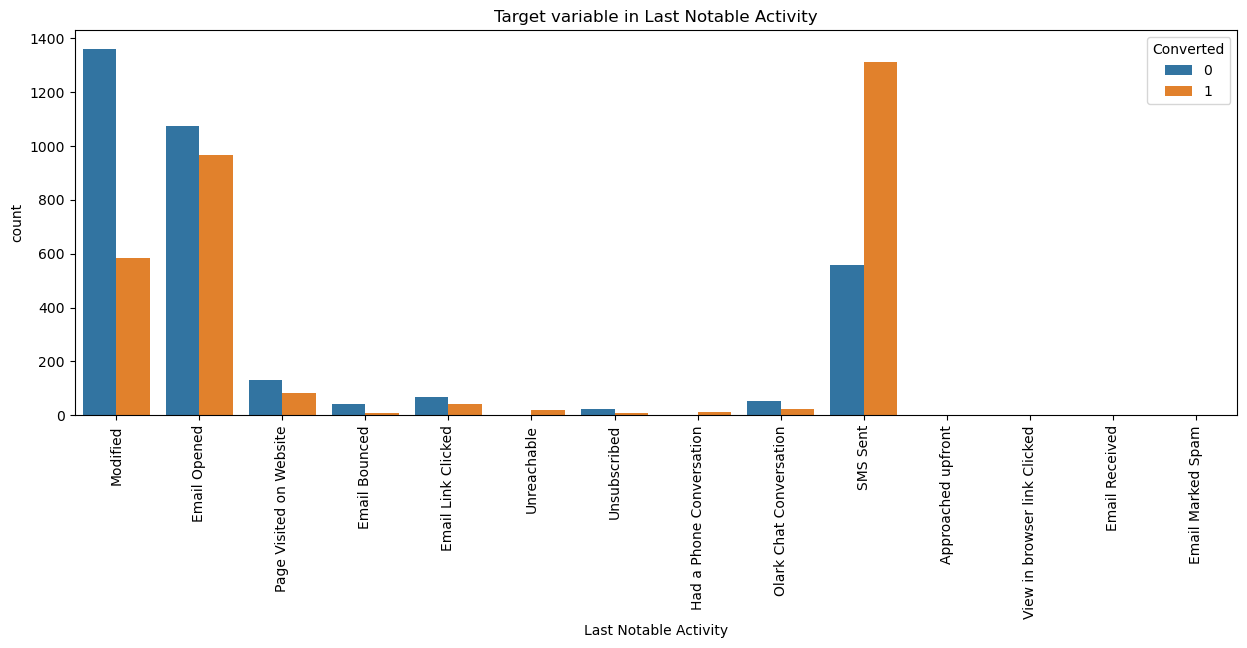

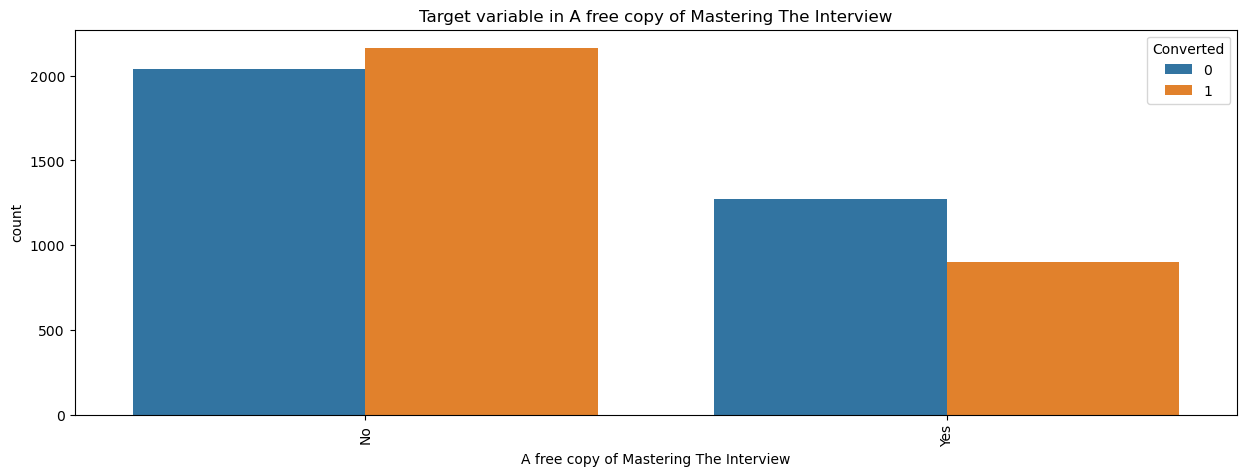

In [156]:
# Analysing categorical variables

cols=['Lead Origin','Lead Source','Do Not Email','Specialization','What is your current occupation',
      'Last Activity','Last Notable Activity','A free copy of Mastering The Interview']
plt.figure(figsize =(15,5))
for i in cols:
    plt.figure(figsize =(15,5))
    sns.countplot(x=lead_df[i], hue=lead_df.Converted)
    plt.xticks(rotation = 90)
    plt.title('Target variable in'+' '+ i)
    plt.xlabel(i)
    plt.show()

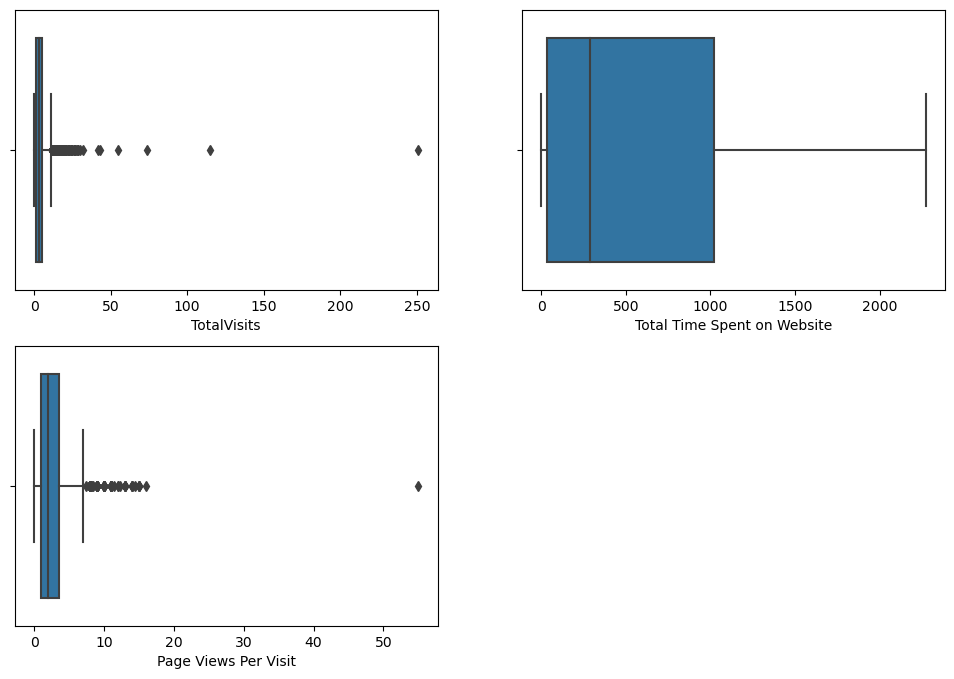

In [157]:
# Analysing numerical features

numvars=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
plt.figure(figsize=[12,8])
c=1
for i in numvars:
    plt.subplot(2,2,c)
    sns.boxplot(x=lead_df[i],data=lead_df)
    c=c+1
plt.show()

### OBSERVATIONS
* Outliers are visible

In [158]:
# Transforming the above variables using PowerTransformer()

var=lead_df[['Lead Number','TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
pt=PowerTransformer()
lead_df1=pd.DataFrame(pt.fit_transform(var))
lead_df1.columns=var.columns
lead_df1.head()

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,1.221245e-15,-1.539988,-1.532509,-1.534722,-0.962570
1,1.221245e-15,0.690854,0.641870,0.230818,-0.962570
2,1.221245e-15,-0.219742,1.262512,-0.019004,1.038885
3,1.221245e-15,-0.723932,0.153656,-0.629842,-0.962570
4,1.221245e-15,-0.219742,1.204175,-0.629842,1.038885


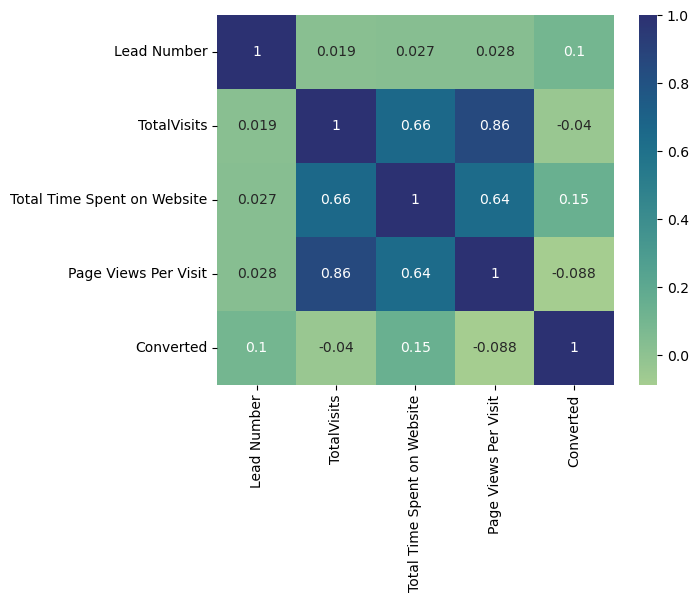

In [159]:
# Let's check the correlation with a heat map

sns.heatmap(lead_df1.corr(),annot=True,cmap='crest')
plt.show()

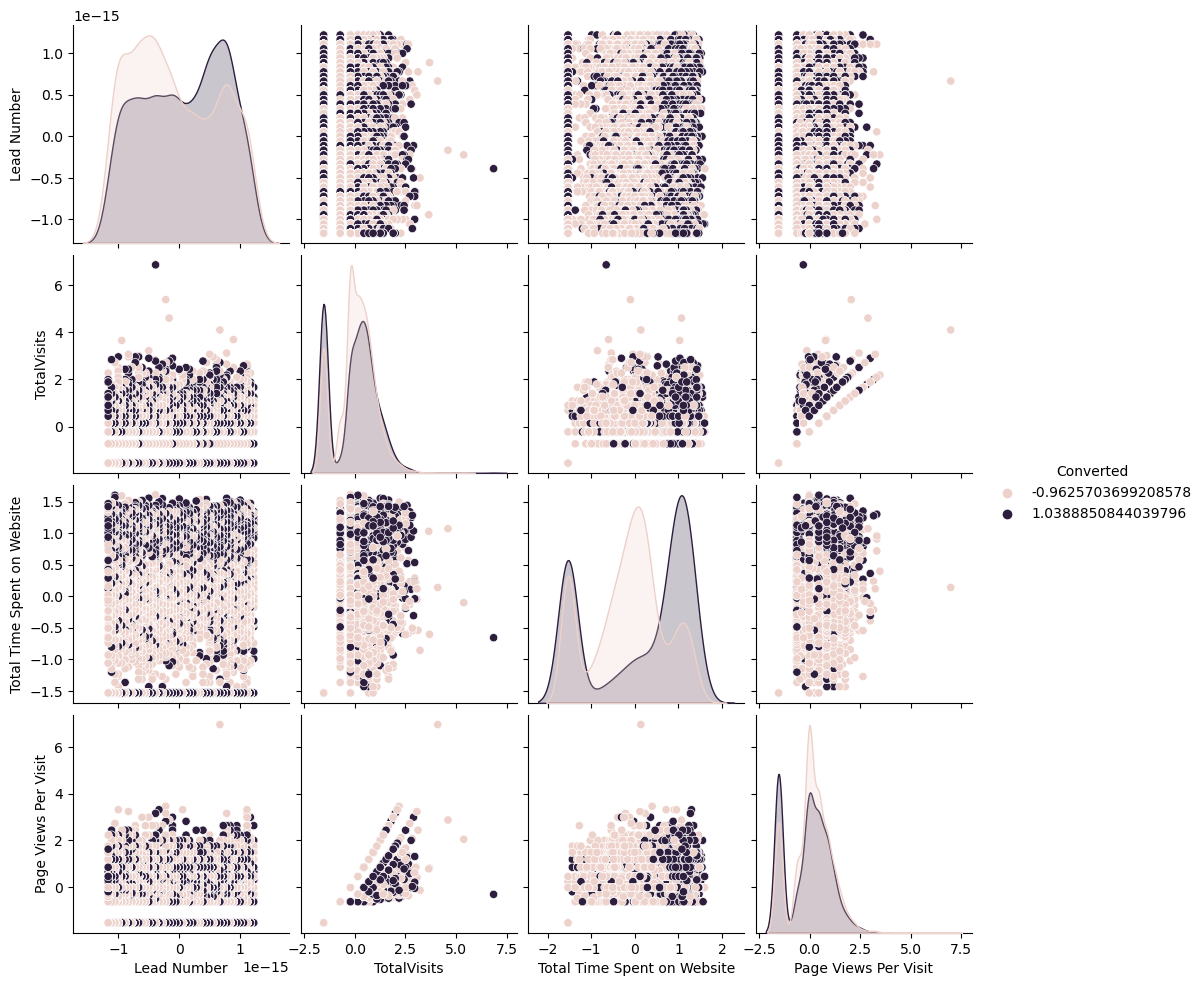

In [160]:
# Check a pairplot

sns.pairplot(lead_df1,diag_kind='kde',hue='Converted')
plt.show()

In [161]:
# Dropping Prospect ID and Lead number as they are of no use in the analysis

lead_df.drop(['Prospect ID','Lead Number'],axis=1,inplace=True)

In [162]:
lead_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Not Available,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Not Available,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Not Available,Unemployed,No,Modified


### Dummy variable creation

In [163]:
lead_df2=pd.get_dummies(lead_df[['Lead Origin','Lead Source','Do Not Email','Last Activity','Specialization',
         'What is your current occupation','A free copy of Mastering The Interview','Last Notable Activity']],
                        drop_first=True,dtype=int)

In [164]:
lead_df2.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [165]:
# Joining the above dataframe with our original cleaned dataframe

lead_df=pd.concat([lead_df2,lead_df],axis=1)
lead_df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,0,0,0,0,0,1,0,0,0,0,...,No,0,0.0,0,0.0,Page Visited on Website,Not Available,Unemployed,No,Modified
1,0,0,0,0,0,0,1,0,0,0,...,No,0,5.0,674,2.5,Email Opened,Not Available,Unemployed,No,Email Opened
2,1,0,0,0,0,0,0,0,0,0,...,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,1,0,0,0,0,0,0,0,0,0,...,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,1,0,0,0,1,0,0,0,0,0,...,No,1,2.0,1428,1.0,Converted to Lead,Not Available,Unemployed,No,Modified


In [166]:
# Dropping the Specialization_Not Avaiable column which was originally the 'Select' level in Specialization

lead_df=lead_df.drop('Specialization_Not Available',axis=1)

In [167]:
# Dropping the columns for which dummy variable has been created

lead_df.drop(['Lead Origin','Lead Source','Do Not Email','Last Activity','Specialization',
         'What is your current occupation','A free copy of Mastering The Interview','Last Notable Activity'],
             axis=1,inplace=True)

In [168]:
lead_df.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0.0,0,0.0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,5.0,674,2.5
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,2.0,1532,2.0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,305,1.0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,2.0,1428,1.0


## MODEL BUILDING

In [169]:
# Train-Test split of the dataset

np.random.seed(0)
X=lead_df.drop('Converted',axis=1)
y=lead_df['Converted']
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print("X_train Size", X_train.shape)
print("y_train Size", y_train.shape)

X_train Size (4461, 62)
y_train Size (4461,)


In [170]:
# Scaling the variables

scaler=StandardScaler()
numvars=['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']
X_train[numvars]=scaler.fit_transform(X_train[numvars])
X_train.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,...,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,TotalVisits,Total Time Spent on Website,Page Views Per Visit
8003,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0.064874,-0.824395,-0.223652
218,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0.064874,-0.611929,0.753710
4171,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0.431907,-0.804919,1.731071
4037,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,-0.669191,-0.943022,-1.201013
3660,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,-0.669191,-0.943022,-1.201013


In [171]:
# Model with all features

import statsmodels.api as sm

logm=sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4402
Model Family:                Binomial   Df Model:                           58
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 18 Dec 2023   Deviance:                   1.1918e+05
Time:                        10:39:36   Pearson chi2:                 5.83e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 3.505e+13   2.91e+07    1.2e+06      0.000     3.5e+13     3.5e+13
Lead Origin_Landing Page Submission                  -1.298e+14   3.61e+06   -3.6e+07      0.000    -1.3e+14    -1.3e+14
Lead Origin_Lead Add Form                             1.421e+15   3.37e+07   4.22e+07      0.000    1.42e+15    1.42e+15
Lead Origin_Lead Import                              -3.803e+14    8.7e+06  -4.37e+07      0.000    -3.8e+14    -3.8e+14
Lead Source_Facebook                                 -3.803e+14    8.7e+06  -4.37e+07      0.000    -3.8e+14    -3.8e+14
Lead Source_Google                                    4.695e+13    3.3e+06   1.42e+07      0.000    4.69e+13    4.69e+13
Lead Source_Olark Chat                               -6.802e+14   4.77e+06  -1.42e+08      0.000    -6.8e+14    -6.8e+14
Lead Source_Organic Search                            9.803e+13   3.71e+06   2.65e+07      0.000     9.8e+13     9.8e+13
Lead Source_Others                                   -7.373e+14   2.52e+07  -2.93e+07      0.000   -7.37e+14   -7.37e+14
Lead Source_Reference                                -2.441e+14    3.4e+07  -7.19e+06      0.000   -2.44e+14   -2.44e+14
Lead Source_Referral Sites                            2.694e+14   1.01e+07   2.66e+07      0.000    2.69e+14    2.69e+14
Lead Source_Welingak Website                          8.815e+14   3.44e+07   2.56e+07      0.000    8.81e+14    8.81e+14
Do Not Email_Yes                                      -7.46e+14   5.41e+06  -1.38e+08      0.000   -7.46e+14   -7.46e+14
Last Activity_Email Bounced                          -3.536e+14   9.82e+06   -3.6e+07      0.000   -3.54e+14   -3.54e+14
Last Activity_Email Link Clicked                      6.466e+14    1.1e+07   5.88e+07      0.000    6.47e+14    6.47e+14
Last Activity_Email Opened                            6.905e+14   6.17e+06   1.12e+08      0.000     6.9e+14     6.9e+14
Last Activity_Form Submitted on Website               7.943e+13   1.02e+07   7.78e+06      0.000    7.94e+13    7.94e+13
Last Activity_Had a Phone Conversation                5.371e+14   2.59e+07   2.08e+07      0.000    5.37e+14    5.37e+14
Last Activity_Olark Chat Conversation                 8.462e+14   6.68e+06   1.27e+08      0.000    8.46e+14    8.46e+14
Last Activity_Others                                  4.322e+14   2.43e+07   1.78e+07      0.000    4.32e+14    4.32e+14
Last Activity_Page Visited on Website                 2.246e+14   7.22e+06   3.11e+07      0.000    2.25e+14    2.25e+14
Last Activity_SMS Sent                                3.584e+14   6.58e+06   5.45e+07      0.000    3.58e+14    3.58e+14
Last Activity_Unreachable                             -1.3

In [172]:
# Instantiate LogisticRegression

logreg=LogisticRegression()

In [173]:
# Using Recursive Feature Elimination to get the features to select

rfe=RFE(logreg,n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [174]:
rfe.support_

array([False,  True, False, False, False,  True, False, False,  True,
       False,  True,  True, False, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True,  True,  True,
       False, False, False, False, False, False,  True,  True, False,
       False, False,  True, False, False, False,  True, False])

In [175]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Lead Origin_Landing Page Submission', False, 12),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 28),
 ('Lead Source_Facebook', False, 3),
 ('Lead Source_Google', False, 25),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 37),
 ('Lead Source_Others', False, 11),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Email Bounced', False, 5),
 ('Last Activity_Email Link Clicked', False, 33),
 ('Last Activity_Email Opened', False, 6),
 ('Last Activity_Form Submitted on Website', False, 44),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', False, 9),
 ('Last Activity_Others', False, 2),
 ('Last Activity_Page Visited on Website', False, 45),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreachable', False, 40),
 ('Last Activity_Unsubscribed', False, 31)

In [176]:
# Putting all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [177]:
# Select only the columns selected by RFE

X_train=X_train[col]
X_train.head()

,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable,Total Time Spent on Website
8003,0,0,0,0,0,0,1,0,0,1,0,0,0,0,-0.824395
218,0,0,0,0,0,0,0,0,0,1,0,0,1,0,-0.611929
4171,0,0,0,0,0,0,0,0,0,1,0,0,1,0,-0.804919
4037,0,1,0,0,0,0,0,0,0,1,0,0,0,0,-0.943022
3660,1,0,1,0,0,0,1,0,0,1,0,0,0,0,-0.943022


### MODEL 1

In [178]:
X_train_sm = sm.add_constant(X_train)
logm=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2038.7
Date:                Mon, 18 Dec 2023   Deviance:                       4077.4
Time:                        10:39:39   Pearson chi2:                 4.69e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3756
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6583      0.602      1.094      0.274      -0.521       1.838
Lead Origin_Lead Add Form                                2.8029      1.219      2.299      0.022       0.413       5.193
Lead Source_Olark Chat                                   1.2977      0.114     11.342      0.000       1.073       1.522
Lead Source_Reference                                    1.2756      1.243      1.026      0.305      -1.161       3.712
Lead Source_Welingak Website                             3.2908      1.580      2.082      0.037       0.193       6.388
Do Not Email_Yes                                        -1.4166      0.193     -7.327      0.000      -1.795      -1.038
Last Activity_Had a Phone Conversation                   1.6253      0.984      1.652      0.099      -0.304       3.554
Last Activity_SMS Sent                                   0.9927      0.084     11.771      0.000       0.827       1.158
What is your current occupation_Housewife               22.4128   2.39e+04      0.001      0.999   -4.69e+04    4.69e+04
What is your current occupation_Student                 -1.3322      0.639     -2.085      0.037      -2.585      -0.080
What is your current occupation_Unemployed              -1.4578      0.603     -2.418      0.016      -2.639      -0.276
What is your current occupation_Working Professional     1.1501      0.632      1.820      0.069      -0.088       2.389
Last Notable Activity_Had a Phone Conversation          22.4823   2.08e+04      0.001      0.999   -4.08e+04    4.08e+04
Last Notable Activity_Modified                          -0.8433      0.090     -9.400      0.000      -1.019      -0.667
Last Notable Activity_Unreachable                        2.4696      0.807      3.061      0.002       0.888       4.051
Total Time Spent on Website                              1.0948      0.046     23.674      0.000       1.004       1.185
========================================================================================================================
"""

In [179]:
# Checking VIF

a=X_train_sm.drop('const',axis=1)
vif=pd.DataFrame()
X=a
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif=vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Origin_Lead Add Form,84.15
2,Lead Source_Reference,65.19
3,Lead Source_Welingak Website,20.03
5,Last Activity_Had a Phone Conversation,2.45
11,Last Notable Activity_Had a Phone Conversation,2.44
9,What is your current occupation_Unemployed,2.43
6,Last Activity_SMS Sent,1.68
12,Last Notable Activity_Modified,1.57
1,Lead Source_Olark Chat,1.37
10,What is your current occupation_Working Profes...,1.31


In [180]:
# Dropping Last Notable Activity_Had a Phone Conversation which has high p-value and VIF

X_train_rfe1=X_train.drop('Last Notable Activity_Had a Phone Conversation',axis=1)

### MODEL 2

In [181]:
X_train_sm = sm.add_constant(X_train_rfe1)
logm=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4446
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2040.7
Date:                Mon, 18 Dec 2023   Deviance:                       4081.3
Time:                        10:39:39   Pearson chi2:                 4.69e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3750
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.6615      0.602      1.099      0.272      -0.518       1.841
Lead Origin_Lead Add Form                                2.8023      1.220      2.297      0.022       0.412       5.193
Lead Source_Olark Chat                                   1.2965      0.114     11.331      0.000       1.072       1.521
Lead Source_Reference                                    1.2758      1.243      1.026      0.305      -1.161       3.713
Lead Source_Welingak Website                             3.2900      1.581      2.081      0.037       0.192       6.388
Do Not Email_Yes                                        -1.4161      0.193     -7.326      0.000      -1.795      -1.037
Last Activity_Had a Phone Conversation                   2.8921      0.799      3.621      0.000       1.327       4.458
Last Activity_SMS Sent                                   0.9909      0.084     11.753      0.000       0.826       1.156
What is your current occupation_Housewife               21.4129   1.45e+04      0.001      0.999   -2.84e+04    2.85e+04
What is your current occupation_Student                 -1.3325      0.639     -2.085      0.037      -2.585      -0.080
What is your current occupation_Unemployed              -1.4577      0.603     -2.418      0.016      -2.639      -0.276
What is your current occupation_Working Professional     1.1489      0.632      1.818      0.069      -0.090       2.388
Last Notable Activity_Modified                          -0.8521      0.090     -9.508      0.000      -1.028      -0.676
Last Notable Activity_Unreachable                        2.4659      0.807      3.057      0.002       0.885       4.047
Total Time Spent on Website                              1.0934      0.046     23.653      0.000       1.003       1.184
========================================================================================================================
"""

In [182]:
# Checking VIF

a=X_train_sm.drop('const',axis=1)
vif=pd.DataFrame()
X=a
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif=vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Origin_Lead Add Form,84.15
2,Lead Source_Reference,65.19
3,Lead Source_Welingak Website,20.03
9,What is your current occupation_Unemployed,2.43
6,Last Activity_SMS Sent,1.68
11,Last Notable Activity_Modified,1.56
1,Lead Source_Olark Chat,1.37
10,What is your current occupation_Working Profes...,1.31
13,Total Time Spent on Website,1.28
4,Do Not Email_Yes,1.09


In [183]:
# Dropping What is your current occupation_Housewife due to high p-value

X_train_rfe2=X_train_rfe1.drop('What is your current occupation_Housewife',axis=1)

In [184]:
X_train_sm = sm.add_constant(X_train_rfe2)
logm=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4447
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2042.7
Date:                Mon, 18 Dec 2023   Deviance:                       4085.4
Time:                        10:39:39   Pearson chi2:                 4.70e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3745
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1863      0.553      2.147      0.032       0.103       2.269
Lead Origin_Lead Add Form                                2.8014      1.220      2.297      0.022       0.411       5.192
Lead Source_Olark Chat                                   1.2950      0.114     11.317      0.000       1.071       1.519
Lead Source_Reference                                    1.2765      1.243      1.027      0.305      -1.160       3.713
Lead Source_Welingak Website                             3.2907      1.581      2.082      0.037       0.192       6.389
Do Not Email_Yes                                        -1.4202      0.194     -7.337      0.000      -1.800      -1.041
Last Activity_Had a Phone Conversation                   2.8914      0.799      3.620      0.000       1.326       4.457
Last Activity_SMS Sent                                   0.9912      0.084     11.757      0.000       0.826       1.156
What is your current occupation_Student                 -1.8573      0.593     -3.131      0.002      -3.020      -0.695
What is your current occupation_Unemployed              -1.9825      0.554     -3.579      0.000      -3.068      -0.897
What is your current occupation_Working Professional     0.6240      0.585      1.066      0.286      -0.523       1.771
Last Notable Activity_Modified                          -0.8506      0.090     -9.499      0.000      -1.026      -0.675
Last Notable Activity_Unreachable                        2.4644      0.807      3.054      0.002       0.883       4.046
Total Time Spent on Website                              1.0930      0.046     23.650      0.000       1.002       1.184
========================================================================================================================
"""

In [185]:
# Checking VIF

a=X_train_sm.drop('const',axis=1)
vif=pd.DataFrame()
X=a
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif=vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Lead Origin_Lead Add Form,84.15
2,Lead Source_Reference,65.19
3,Lead Source_Welingak Website,20.03
8,What is your current occupation_Unemployed,2.43
6,Last Activity_SMS Sent,1.68
10,Last Notable Activity_Modified,1.56
1,Lead Source_Olark Chat,1.37
9,What is your current occupation_Working Profes...,1.31
12,Total Time Spent on Website,1.28
4,Do Not Email_Yes,1.09


In [186]:
# Dropping Lead Source_Reference which has high p-value and VIF

X_train_rfe3=X_train_rfe2.drop('Lead Source_Reference',axis=1)

In [187]:
X_train_sm = sm.add_constant(X_train_rfe3)
logm=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4448
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2043.1
Date:                Mon, 18 Dec 2023   Deviance:                       4086.2
Time:                        10:39:39   Pearson chi2:                 4.68e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3744
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.1870      0.552      2.148      0.032       0.104       2.270
Lead Origin_Lead Add Form                                4.0395      0.256     15.792      0.000       3.538       4.541
Lead Source_Olark Chat                                   1.2949      0.114     11.315      0.000       1.071       1.519
Lead Source_Welingak Website                             2.0525      1.037      1.979      0.048       0.019       4.086
Do Not Email_Yes                                        -1.4186      0.193     -7.334      0.000      -1.798      -1.039
Last Activity_Had a Phone Conversation                   2.8916      0.799      3.620      0.000       1.326       4.457
Last Activity_SMS Sent                                   0.9914      0.084     11.760      0.000       0.826       1.157
What is your current occupation_Student                 -1.8569      0.593     -3.131      0.002      -3.019      -0.695
What is your current occupation_Unemployed              -1.9833      0.554     -3.581      0.000      -3.069      -0.898
What is your current occupation_Working Professional     0.6242      0.585      1.067      0.286      -0.523       1.771
Last Notable Activity_Modified                          -0.8508      0.090     -9.502      0.000      -1.026      -0.675
Last Notable Activity_Unreachable                        2.4648      0.807      3.054      0.002       0.883       4.046
Total Time Spent on Website                              1.0930      0.046     23.647      0.000       1.002       1.184
========================================================================================================================
"""

In [188]:
a=X_train_sm.drop('const',axis=1)
vif=pd.DataFrame()
X=a
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif=vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,What is your current occupation_Unemployed,2.43
5,Last Activity_SMS Sent,1.68
0,Lead Origin_Lead Add Form,1.65
9,Last Notable Activity_Modified,1.56
1,Lead Source_Olark Chat,1.37
2,Lead Source_Welingak Website,1.33
8,What is your current occupation_Working Profes...,1.31
11,Total Time Spent on Website,1.28
3,Do Not Email_Yes,1.09
6,What is your current occupation_Student,1.04


In [189]:
# Dropping What is your current occupation_Working Professional due to high p-value

X_train_rfe4=X_train_rfe3.drop('What is your current occupation_Working Professional',axis=1)

In [190]:
X_train_sm = sm.add_constant(X_train_rfe4)
logm=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=logm.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4449
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2043.7
Date:                Mon, 18 Dec 2023   Deviance:                       4087.3
Time:                        10:39:40   Pearson chi2:                 4.65e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3742
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                          1.7491      0.188      9.296      0.000       1.380       2.118
Lead Origin_Lead Add Form                      4.0410      0.256     15.799      0.000       3.540       4.542
Lead Source_Olark Chat                         1.2964      0.114     11.330      0.000       1.072       1.521
Lead Source_Welingak Website                   2.0508      1.037      1.977      0.048       0.018       4.084
Do Not Email_Yes                              -1.4175      0.193     -7.328      0.000      -1.797      -1.038
Last Activity_Had a Phone Conversation         2.8940      0.799      3.624      0.000       1.329       4.459
Last Activity_SMS Sent                         0.9945      0.084     11.810      0.000       0.829       1.159
What is your current occupation_Student       -2.4199      0.284     -8.513      0.000      -2.977      -1.863
What is your current occupation_Unemployed    -2.5468      0.188    -13.542      0.000      -2.915      -2.178
Last Notable Activity_Modified                -0.8510      0.090     -9.504      0.000      -1.026      -0.675
Last Notable Activity_Unreachable              2.4662      0.807      3.056      0.002       0.885       4.048
Total Time Spent on Website                    1.0931      0.046     23.647      0.000       1.003       1.184
==============================================================================================================
"""

In [191]:
a=X_train_sm.drop('const',axis=1)
vif=pd.DataFrame()
X=a
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'], 2)
vif=vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,What is your current occupation_Unemployed,2.19
5,Last Activity_SMS Sent,1.52
0,Lead Origin_Lead Add Form,1.51
8,Last Notable Activity_Modified,1.50
1,Lead Source_Olark Chat,1.34
2,Lead Source_Welingak Website,1.30
10,Total Time Spent on Website,1.24
3,Do Not Email_Yes,1.09
6,What is your current occupation_Student,1.04
4,Last Activity_Had a Phone Conversation,1.01


### OBSERVATIONS
* All the p-values and VIF values are within range

## MODEL EVALUATION

In [192]:
y_train_pred=res.predict(sm.add_constant(X_train_rfe4))
y_train_pred[:10]

8003    0.330830
218     0.089677
4171    0.073881
4037    0.370009
3660    0.961093
207     0.120614
2044    0.123308
6411    0.913736
6498    0.051875
2085    0.986118
dtype: float64

In [193]:
# Reshaping it into an array

y_train_pred=y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.33083001, 0.08967657, 0.07388062, 0.37000908, 0.96109341,
       0.1206137 , 0.12330796, 0.91373557, 0.05187475, 0.98611847])

### Creating a dataframe with conversion flag and their predicted probabilities

In [194]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conv_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Conv_Prob,Lead Number
0,0,0.330830,8003
1,0,0.089677,218
2,1,0.073881,4171
3,1,0.370009,4037
4,1,0.961093,3660


### Creating column 'Predicted' with 1 if Conv_Prob > 0.5 else 0

In [195]:
y_train_pred_final['predicted'] = y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,Lead Number,predicted
0,0,0.330830,8003,0
1,0,0.089677,218,0
2,1,0.073881,4171,0
3,1,0.370009,4037,0
4,1,0.961093,3660,1


In [196]:
from sklearn import metrics

In [197]:
# Confusion matrix
confusion=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[1939  373]
 [ 559 1590]]


In [198]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7910782335799148


### OBSERVATIONS
* The accuracy of the model is about 79.1 %

## Metrics Beyond Accuracy

In [199]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [200]:
# Let's see the sensitivity of our model
TP / float(TP+FN)

0.7398790134946487

In [201]:
# Let us calculate specificity
TN / float(TN+FP)

0.8386678200692042

In [202]:
# Calculate false postive rate - predicting conversion when customer does not convert
print(FP/ float(TN+FP))

0.16133217993079585


### OBSERVATIONS
* The sensitivity of the model is 73.9 %
* The specificity of the model is 83.8 %
* The false positive rate is 16.1 %

### Finding the optimal cutoff with ROC curve

In [203]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [204]:
fpr, tpr, thresholds=metrics.roc_curve(y_train_pred_final.Converted, 
                                         y_train_pred_final.Conv_Prob, drop_intermediate = False )

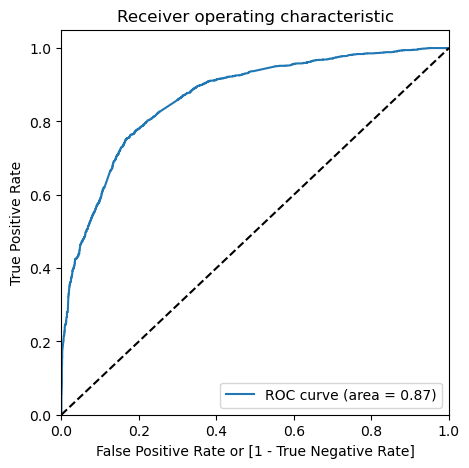

In [205]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

In [206]:
# creating columns with different probability cutoff

numbers=[float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]=y_train_pred_final.Conv_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conv_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.330830,8003,0,1,1,1,1,0,0,0,0,0,0
1,0,0.089677,218,0,1,0,0,0,0,0,0,0,0,0
2,1,0.073881,4171,0,1,0,0,0,0,0,0,0,0,0
3,1,0.370009,4037,0,1,1,1,1,0,0,0,0,0,0
4,1,0.961093,3660,1,1,1,1,1,1,1,1,1,1,1


In [207]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total=sum(sum(cm))
    accuracy=(cm[0,0]+cm[1,1])/total
    
    specificity=cm[0,0]/(cm[0,0]+cm[0,1])
    sensitivity=cm[1,1]/(cm[1,0]+cm[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.481731     1.000000     0.000000
0.1   0.1  0.572517     0.986040     0.188149
0.2   0.2  0.689980     0.949744     0.448529
0.3   0.3  0.765523     0.898557     0.641869
0.4   0.4  0.787267     0.805491     0.770329
0.5   0.5  0.791078     0.739879     0.838668
0.6   0.6  0.773593     0.668683     0.871107
0.7   0.7  0.740417     0.550954     0.916522
0.8   0.8  0.707241     0.442066     0.953720
0.9   0.9  0.659493     0.312238     0.982266


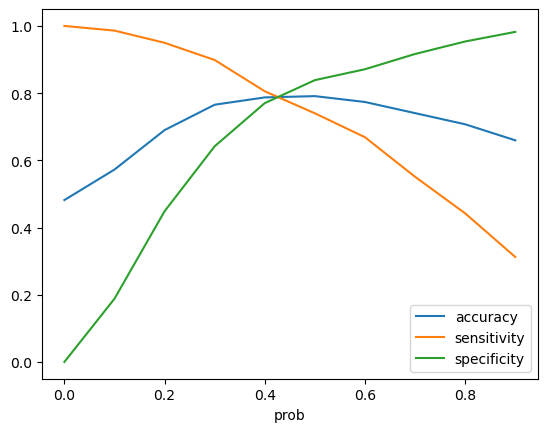

In [208]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.show()

### OBSERVATIONS
* We are going to take the cutoff probability to be 0.45

In [209]:
y_train_pred_final['final_predicted']=y_train_pred_final.Conv_Prob.map( lambda x: 1 if x > 0.45 else 0)

y_train_pred_final.head()

,Converted,Conv_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.330830,8003,0,1,1,1,1,0,0,0,0,0,0,0
1,0,0.089677,218,0,1,0,0,0,0,0,0,0,0,0,0
2,1,0.073881,4171,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.370009,4037,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.961093,3660,1,1,1,1,1,1,1,1,1,1,1,1


In [210]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7910782335799148

In [211]:
confusion2=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[1877,  435],
       [ 497, 1652]], dtype=int64)

In [212]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [213]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7687296416938111

In [214]:
# Let us calculate specificity
TN / float(TN+FP)

0.8118512110726643

In [215]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.18814878892733564


### Precision and Recall

In [216]:
confusion=metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[1939,  373],
       [ 559, 1590]], dtype=int64)

In [217]:
from sklearn.metrics import precision_score, recall_score

In [218]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8099847172694855

In [219]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7398790134946487

#### Precision recall tradeoff

In [220]:
from sklearn.metrics import precision_recall_curve

In [221]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conv_Prob)

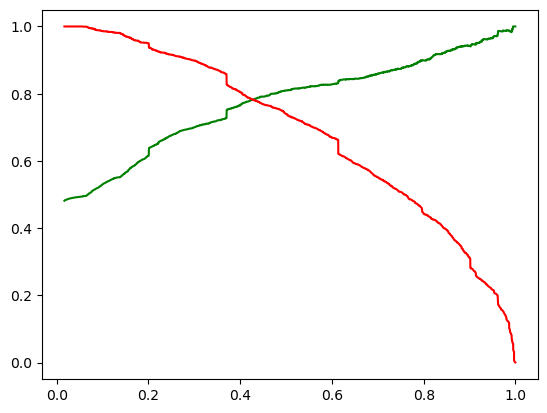

In [222]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### OBSERVATIONS
* The precision of the model comes out to be 80.9 %
* The recall of the model is around 73.9 %
* The precision-recall curve shows the optimal cutoff to be around 0.43

## Making Predictions

In [223]:
X_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']]=scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])



In [224]:
X_test = X_test[col]
X_test.head()

,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Unreachable,Total Time Spent on Website
4771,1,0,1,0,0,0,1,0,0,0,1,0,0,0,-0.943022
6122,0,0,0,0,0,0,0,0,0,1,0,0,0,0,-0.826165
9202,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0.733689
6570,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0.581422
2668,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0.646932


In [225]:
# Dropping the columns in test set which are not present in the model 

X_test.drop(['Last Notable Activity_Had a Phone Conversation','What is your current occupation_Housewife',
             'Lead Source_Reference','What is your current occupation_Working Professional'],axis=1,inplace=True)

In [226]:
# Making predictions on the test set
X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_Modified,Last Notable Activity_Unreachable,Total Time Spent on Website
4771,1.0,1,0,0,0,0,1,0,0,0,0,-0.943022
6122,1.0,0,0,0,0,0,0,0,1,0,0,-0.826165
9202,1.0,0,0,0,0,0,1,0,1,0,0,0.733689
6570,1.0,0,0,0,1,0,1,0,1,0,0,0.581422
2668,1.0,0,0,0,0,0,1,0,1,1,0,0.646932
...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0,0,0,0,0,1,0,1,1,0,-0.833248
6583,1.0,0,0,0,0,0,1,0,1,0,0,-0.330411
5531,1.0,0,0,0,0,0,0,0,1,0,0,1.881006
3056,1.0,0,0,0,1,0,1,0,1,0,0,0.737230


In [227]:
y_test_pred = res.predict(X_test_sm)

In [228]:
y_test_pred

4771    0.996839
6122    0.154358
9202    0.730812
6570    0.357733
2668    0.513236
          ...   
5828    0.172921
6583    0.458980
5531    0.778760
3056    0.397738
4088    0.623314
Length: 1912, dtype: float64

In [229]:
# Converting y_pred to a dataframe which is an array
y_pred_1=pd.DataFrame(y_test_pred)

In [230]:
y_pred_1.head()

,0
4771,0.996839
6122,0.154358
9202,0.730812
6570,0.357733
2668,0.513236


In [231]:
# Converting y_test to dataframe
y_test_df=pd.DataFrame(y_test)

In [232]:
# Using Lead Number as index
y_test_df['Lead Number'] = y_test_df.index

In [233]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [234]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,Lead Number,0
0,1,4771,0.996839
1,0,6122,0.154358
2,0,9202,0.730812
3,1,6570,0.357733
4,1,2668,0.513236


In [235]:
# Renaming and rearranging columns

y_pred_final=y_pred_final.rename(columns={ 0 : 'Conv_Prob'})
y_pred_final=y_pred_final.reindex(['Lead Number','Converted','Conv_Prob'], axis=1)

In [236]:
y_pred_final.head()

,Lead Number,Converted,Conv_Prob
0,4771,1,0.996839
1,6122,0,0.154358
2,9202,0,0.730812
3,6570,1,0.357733
4,2668,1,0.513236


In [237]:
# Making predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.45 else 0)
y_pred_final.head()

,Lead Number,Converted,Conv_Prob,final_predicted
0,4771,1,0.996839,1
1,6122,0,0.154358,0
2,9202,0,0.730812,1
3,6570,1,0.357733,0
4,2668,1,0.513236,1


In [238]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7892259414225942

### OBSERVATIONS
* The test data is showing a 78.9 % accuracy

In [239]:
confusion3=metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion3

array([[808, 188],
       [215, 701]], dtype=int64)

In [240]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [241]:
# Sensitivity

TP / float(TP+FN)

0.7687296416938111

In [242]:
# Specificity

TN / float(TN+FP)

0.8118512110726643

In [243]:
# Making predictions on the test set using 0.43 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conv_Prob.map(lambda x: 1 if x > 0.43 else 0)
y_pred_final.head()

,Lead Number,Converted,Conv_Prob,final_predicted
0,4771,1,0.996839,1
1,6122,0,0.154358,0
2,9202,0,0.730812,1
3,6570,1,0.357733,0
4,2668,1,0.513236,1


In [244]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7876569037656904

In [245]:
confusion4=metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion4

array([[792, 204],
       [202, 714]], dtype=int64)

In [246]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [247]:
# Sensitivity

TP / float(TP+FN)

0.7687296416938111

In [248]:
# Specificity

TN / float(TN+FP)

0.8118512110726643

### OBSERVATIONS
* We have observed that using either the cutoff from Precision-recall or from the ROC gives us similar results for Accuracy, Sensitivity and Specificity

In [249]:
# Calculating the Precision

TP/(TP+FP)

0.7915668423574509

In [250]:
# Calculating Recall

TP/(TP+FN)

0.7687296416938111

### OBSERVATIONS
* The precision of the test model is 79.1%
* The recall of the test model is 76.8%
* Both are very close to our training data reults

## INTERPRETATIONS
* It has been observed that people who are unemployed are better targets for conversion
* Lead sources Olark Chat and Welingak website seem to be attracting more customers to convert
* Customers who are filling up the Lead add form have also high chances of conversion
* Customers spending more time on the website will be likely to convert as well